In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Collect JSON data
main_dir = "../../../data/"
pos_dir = "english_netto_list/"
neg_dir = "english_complement/"
#neg_dir = "english_random_sample/"

def load_json(path):
    f = open(path+"/patent_info.json", 'r')
    data = json.load(f)
    f.close()
    return data

def collect_json(group_dir):
    path = main_dir + group_dir
    patent_dirs = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
    return [load_json(path+d) for d in patent_dirs]

pos_json = collect_json(pos_dir)
neg_json = collect_json(neg_dir)

In [3]:
# For testing
#pos_json = pos_json[:300]
#neg_json = neg_json[:300]

In [4]:
# Build corpus
def get_text(j): return [d["description"]["en"] for d in j]
corpus = get_text(pos_json) + get_text(neg_json)
print(len(corpus), "documents collected")

# Build TF-IDF vectors using default tokenizer while discarding non-alphabetic tokens
min_count = 5
max_freq = 0.2
tfidf_vectorizer = TfidfVectorizer(analyzer="word", stop_words="english", 
                                   token_pattern=r'(?u)\b[A-Za-z]+\b', min_df=min_count, max_df=max_freq)
vectors = tfidf_vectorizer.fit_transform(corpus)
vocabulary = tfidf_vectorizer.get_feature_names_out()
print(len(vocabulary), "items in vocabulary")

14662 documents collected
78061 items in vocabulary


In [5]:
# Print examples from vocabulary
print(list(vocabulary[:10]))
print(list(vocabulary[-10:]))

['aa', 'aaa', 'aaaaabbbbbb', 'aaabaabbabbb', 'aaacrylic', 'aab', 'aabb', 'aabs', 'aac', 'aacr']
['zygote', 'zyl', 'zylock', 'zylon', 'zymed', 'zymosan', 'zymosterol', 'zyprexa', 'zytel', 'zz']


In [6]:
# Print terms with highest tf-idf score per document
def top_tfidfs(v, k):
    return vocabulary[v.indices[np.argsort(v.data)[:-(k+1):-1]]]

for i in range(5):
    print(100 * '.')
    print(corpus[i][:400] + "...")
    print("Top tf-idf terms:", top_tfidfs(vectors[i], 5))

....................................................................................................
TECHNICAL FIELD
[0001] The present invention relates to a heat-shrinkable polyester film and a package suitable label applications.
BACKGROUND ART
[0002] Recently, in applications such as label package doubling as a protection of a glass bottle and a PET bottle etc. and display of articles, cap sealing and accumulation package, there have been widely used drawn films (so-called heat-shrinkable fil...
Top tf-idf terms: ['shrinkage' 'shrinkable' 'label' 'absorbancy' 'drawing']
....................................................................................................
FIELD OF INVENTION
[0001] The present invention generally relates to systems and methods for delivering to and/or receiving fluids or other materials, such as blood or interstitial fluid, from subjects, e.g., to or from the skin and/or beneath the skin.
BACKGROUND
[0002] Phlebotomy or venipuncture is the process of o

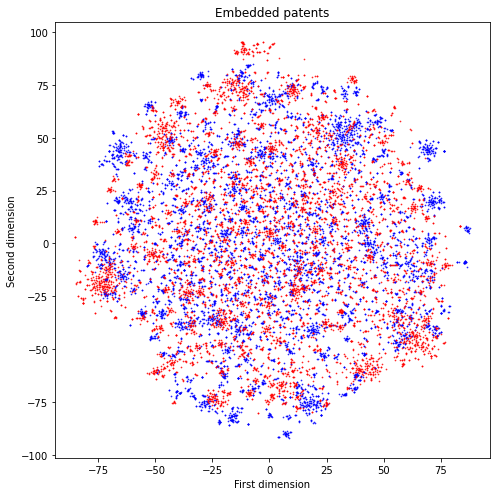

In [7]:
# Embed vectors in two dimensions using t-SNE and scatter plot 
tsne_embedder = TSNE(n_components=2, init="random", learning_rate="auto")

def plot_tsne(v, color='k', new_fig=True):
    v_tsne = tsne_embedder.fit_transform(v)
    if new_fig: plt.figure(figsize=(7, 7))
    plt.scatter(v_tsne[:, 0], v_tsne[:, 1], s=0.5, alpha=0.8, c=color)
    plt.title("Embedded patents")
    plt.xlabel("First dimension")
    plt.ylabel("Second dimension")
    plt.tight_layout()
    if not new_fig: plt.show()
        
num_pos = len(pos_json)
plot_tsne(vectors[:num_pos], color='b', new_fig=True)
plot_tsne(vectors[num_pos:], color='r', new_fig=False)